<a href="https://colab.research.google.com/github/mondo-lee/in2HEP/blob/master/notebooks/cuts_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# path names have been modified to reflect data from my own Github repo
# 10 - Mar - 2025. Found out that to change required custom classes, one must restart the kernel.
from pathlib import Path

data_path = Path('../data-v2/VHbb_data_2jet.csv')
data_train_path = Path('../data-v2/VHbb_data_2jet_train.csv')
data_val_path = Path('../data-v2/VHbb_data_2jet_val.csv')
data_test_path = Path('../data-v2/VHbb_data_2jet_test.csv')
class_path = Path('ucl_masterclass.py')

AttributeError: 'PosixPath' object has no attribute 'type'

In [ ]:
if not data_path.exists():
    !wget -P ../data-v2/ https://raw.githubusercontent.com/mondo-lee/in2HEP/master/data-v2/VHbb_data_2jet.csv
else:
    print("Data file already found")

if not class_path.exists():
    !wget https://raw.githubusercontent.com/mondo-lee/in2HEP/master/notebooks/ucl_masterclass.py
else:
    print("Required custom classes already found")

In [11]:
def download_data(path):
  data_path = Path(path)
  trimmed_path = path.strip('.')
  print(trimmed_path)

  if not data_path.exists():
    bash_path = 'https://raw.githubusercontent.com/mondo-lee/in2HEP/master' + trimmed_path
    print(bash_path)
    !wget -P ../data-v2/ "$bash_path"
  else:
    print("Data file already found")

In [12]:
download_data('../data-v2/VHbb_data_2jet_train.csv')

/data-v2/VHbb_data_2jet_train.csv
https://raw.githubusercontent.com/mondo-lee/in2HEP/master/data-v2/VHbb_data_2jet_train.csv
--2025-03-10 02:59:08--  https://raw.githubusercontent.com/mondo-lee/in2HEP/master/data-v2/VHbb_data_2jet_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28786380 (27M) [text/plain]
Saving to: ‘../data-v2/VHbb_data_2jet_train.csv’

VHbb_data_2jet_trai 100%[===================>]  27.45M   117MB/s    in 0.2s    

2025-03-10 02:59:09 (117 MB/s) - ‘../data-v2/VHbb_data_2jet_train.csv’ saved [28786380/28786380]



Considering some EDA:
- histogram plots
- covariance


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from copy import deepcopy
from ucl_masterclass import *

from tqdm import tqdm

ModuleNotFoundError: No module named 'ucl_masterclass'

In [13]:
# Load data into a pandas data frame
def load_data(path):
  '''
  Returns two copies of a csv in Pandas Dataframe format given its path in the repo, relative to the notebook
  '''
  df = pd.read_csv(path)
  df_original = deepcopy(df)

  return df, df_original

df, df_original = load_data('../data-v2/VHbb_data_2jet.csv')


#df_train = pd.read_csv('..')

NameError: name 'pd' is not defined

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110252 entries, 0 to 110251
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0.3        110252 non-null  int64  
 1   Unnamed: 0.2        110252 non-null  int64  
 2   Unnamed: 0          110252 non-null  int64  
 3   Unnamed: 0.1        110252 non-null  int64  
 4   Unnamed: 0.1.1      110252 non-null  int64  
 5   Unnamed: 0.1.1.1    110252 non-null  int64  
 6   Unnamed: 0.1.1.1.1  110252 non-null  int64  
 7   nJ                  110252 non-null  int64  
 8   EventNumber         110252 non-null  int64  
 9   sample              110252 non-null  object 
 10  EventWeight         110252 non-null  float64
 11  dYWH                110252 non-null  float64
 12  MV1cJ3_cont         110252 non-null  float64
 13  dPhiVBB             110252 non-null  float64
 14  pTB2                110252 non-null  float64
 15  nTags               110252 non-nul

In [5]:
# dropping unusable columns (including 'nJ' and 'nTags' since these are constant (2) in our dataset)
# hopefully this doesn't break anything...?
# 'category' is kept in for now, because I can't tell what it means
# 'sample', 'EventWeight', 'Class', 'post_fit_weight', 'category' and 'training_weight' aren't input features but can still be used to inform decisions
# I'm hoping that the unnamed columns aren't all former index columns

cols_to_remove = ['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0',
                  'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
                  'Unnamed: 0.1.1.1.1', 'nJ', 'EventNumber',
                  'MV1cJ3_cont', 'nTags', 'pTJ3', 'mBBJ',
                  'dPhiLBmin', 'MV1cJ3']

df_trim = df.drop(cols_to_remove,axis=1)
print(df_trim.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110252 entries, 0 to 110251
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sample           110252 non-null  object 
 1   EventWeight      110252 non-null  float64
 2   dYWH             110252 non-null  float64
 3   dPhiVBB          110252 non-null  float64
 4   pTB2             110252 non-null  float64
 5   mBB              110252 non-null  float64
 6   MV1cB1           110252 non-null  float64
 7   MV1cB2           110252 non-null  float64
 8   pTV              110252 non-null  float64
 9   MV1cB1_cont      110252 non-null  float64
 10  nTrackJetsOR     110252 non-null  int64  
 11  pTB1             110252 non-null  float64
 12  MV1cB2_cont      110252 non-null  float64
 13  mTW              110252 non-null  float64
 14  dRBB             110252 non-null  float64
 15  MET              110252 non-null  float64
 16  Mtop             110252 non-null  floa

In [6]:
# reordering columns to match table in intro notebook, moving the columns that cannot be used as input features to the front
new_col_order = ['sample','category','EventWeight',
                 'post_fit_weight','training_weight', 'Class',
                 'dRBB', 'pTB1', 'pTB2', 'pTV', 'mBB', 'Mtop',
                 'mTW', 'MET', 'dYWH', 'dPhiVBB', 'MV1cB1_cont', 'MV1cB2_cont']

df_trim = df_trim[new_col_order]

In [7]:
df_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110252 entries, 0 to 110251
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sample           110252 non-null  object 
 1   category         110252 non-null  object 
 2   EventWeight      110252 non-null  float64
 3   post_fit_weight  110252 non-null  float64
 4   training_weight  110252 non-null  float64
 5   Class            110252 non-null  float64
 6   dRBB             110252 non-null  float64
 7   pTB1             110252 non-null  float64
 8   pTB2             110252 non-null  float64
 9   pTV              110252 non-null  float64
 10  mBB              110252 non-null  float64
 11  Mtop             110252 non-null  float64
 12  mTW              110252 non-null  float64
 13  MET              110252 non-null  float64
 14  dYWH             110252 non-null  float64
 15  dPhiVBB          110252 non-null  float64
 16  MV1cB1_cont      110252 non-null  floa

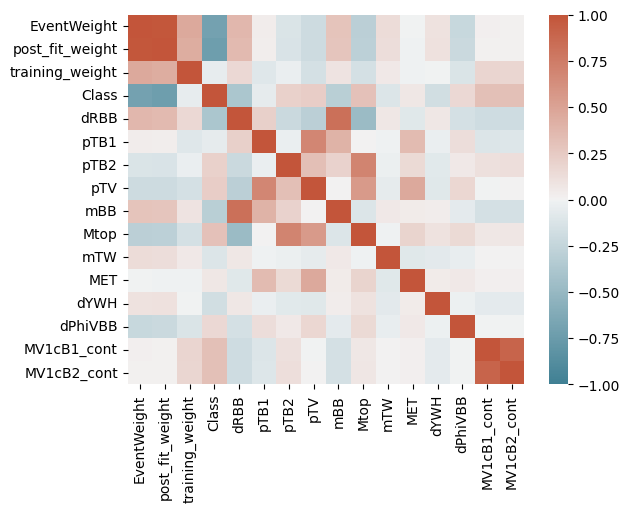

In [8]:
sns.heatmap(df_trim.corr(numeric_only=True),
            vmin=-1,vmax=1,
            cmap=sns.diverging_palette(220, 20, as_cmap=True));
plt.show()

In [9]:
print(df_trim.corr(numeric_only=True)['post_fit_weight']['EventWeight'])

0.9921342033076843


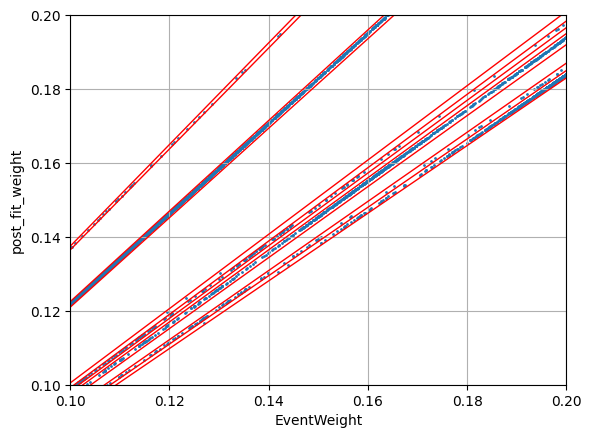

In [10]:
ax = plt.subplot()
ax.scatter(df_trim['EventWeight'], df_trim['post_fit_weight'], s=1)
ax.set_xlabel('EventWeight')
ax.set_ylabel('post_fit_weight')
ax.grid()
ax.set_xlim(0.1,0.2)
ax.set_ylim(0.1,0.2)

xspace = np.linspace(0.1,0.2)

def bounding_lines(grads):
  for grad in grads:
    plt.plot(xspace,grad*xspace,color='r',linewidth=1)

bounding_lines([0.915,0.925,0.935,0.96,0.975,0.983,0.992,1.005,1.21,1.225,1.365,1.375])

In [19]:
def filter_coeff_ratio(df, nom, denom, ranges):
    # find a way to get the stuff into a nice dataframe
    coeff_ratio = df[nom]/df[denom]
    ax = plt.subplot()
    for i in range(len(ranges)-1):
      filter = (coeff_ratio >= ranges[i]) & (coeff_ratio <= ranges[i+1])
      if len(df[filter]) != 0:
        ax.plot(df[filter][denom], df[filter][nom], '.', markersize=2, alpha=0.5, label=f"{ranges[i]} - {ranges[i+1]}")
        print(f"{ranges[i]} - {ranges[i+1]}\n", df[filter]['sample'].value_counts(),'\n')
    plt.xlabel(denom)
    plt.ylabel(nom)
    #ax.set_xlim(0.06,0.1)
    #ax.set_ylim(0.06,0.1)
    ax.legend()
    ax.grid()

0 - 750
 sample
Wbb       12561
ttbar      9357
Wl         2875
stops      2280
Zbb        2227
stopt      1610
Wcl        1406
WZ         1168
Wbc        1037
Wcc         986
stopWt      957
Wbl         544
Zl          402
ZZ          195
WW          159
Zcl         132
Zcc         106
Zbl          96
Zbc          76
Name: count, dtype: int64 

750 - 3000
 sample
qqWlvH125    65056
qqZllH125     6162
ggZllH125      836
ttbar           22
ggZvvH125        2
Name: count, dtype: int64 



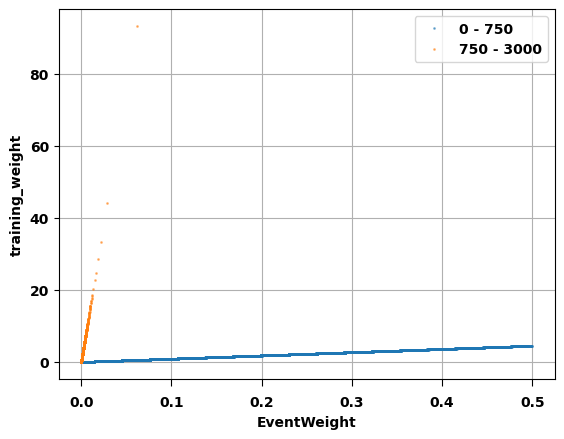

In [26]:
filter_coeff_ratio(df_trim, 'training_weight', 'EventWeight', [0,750,3000])

0.915 - 0.925
 sample
ttbar    9379
Name: count, dtype: int64 

0.925 - 0.935
 sample
Wl     2875
Wcl    1406
Name: count, dtype: int64 

0.96 - 0.975
 sample
stops     2280
stopt     1610
stopWt     957
Name: count, dtype: int64 

0.983 - 0.992
 sample
WZ    1168
Zl     402
ZZ     195
WW     159
Name: count, dtype: int64 

0.992 - 1.005
 sample
qqWlvH125    65056
qqZllH125     6162
ggZllH125      836
Zcl            132
ggZvvH125        2
Name: count, dtype: int64 

1.21 - 1.225
 sample
Wbb    12561
Wbc     1037
Wcc      986
Wbl      544
Name: count, dtype: int64 

1.365 - 1.375
 sample
Zbb    2227
Zcc     106
Zbl      96
Zbc      76
Name: count, dtype: int64 



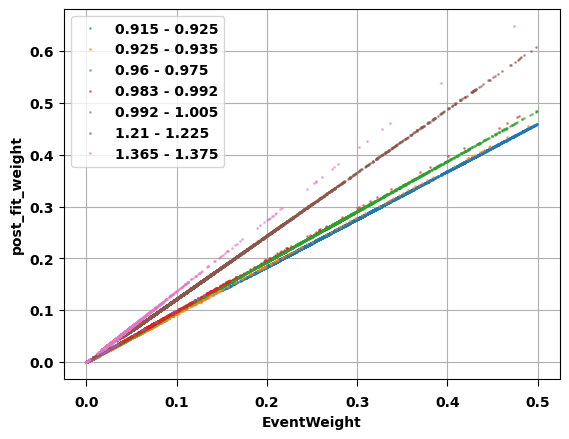

In [20]:
# filtering out different linear trends between post_fit_weight/training and EventWeight to 'reverse engineer' what contributes to the coefficients
filter_coeff_ratio(df_trim, 'post_fit_weight', 'EventWeight', [0.915,0.925,0.935,0.96,0.975,0.983,0.992,1.005,1.21,1.225,1.365,1.375])

#ax = plt.subplot()
#ax.scatter(df_trim[slope_filter_ep1]['EventWeight'], df_trim[slope_filter_ep1]['post_fit_weight'],s=2)

Index(['sample', 'category', 'EventWeight', 'post_fit_weight',
       'training_weight', 'Class', 'dRBB', 'pTB1', 'pTB2', 'pTV', 'mBB',
       'Mtop', 'mTW', 'MET', 'dYWH', 'dPhiVBB', 'MV1cB1_cont', 'MV1cB2_cont'],
      dtype='object')


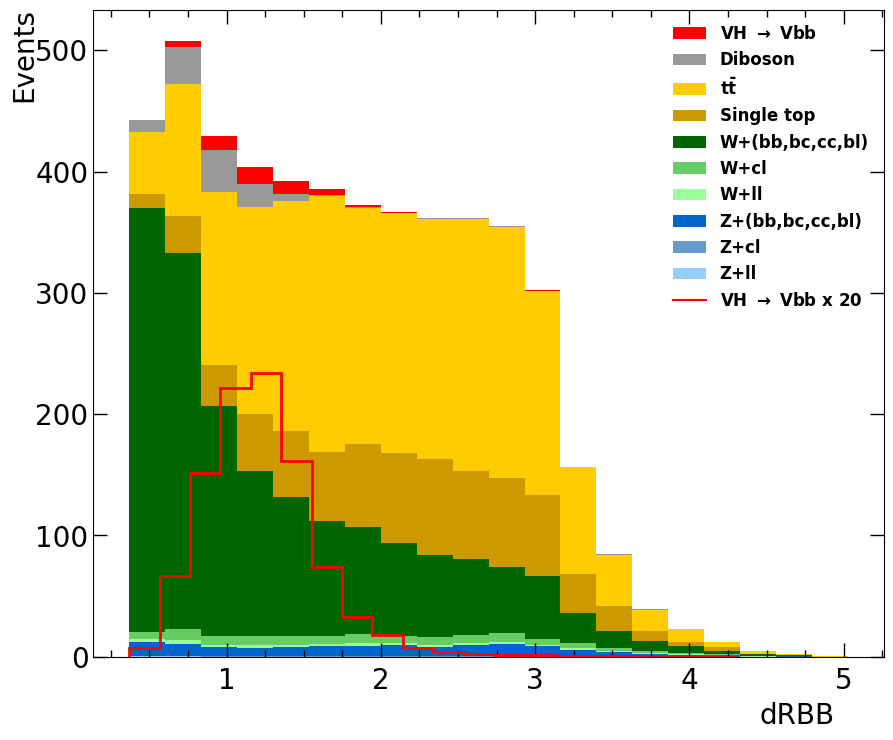

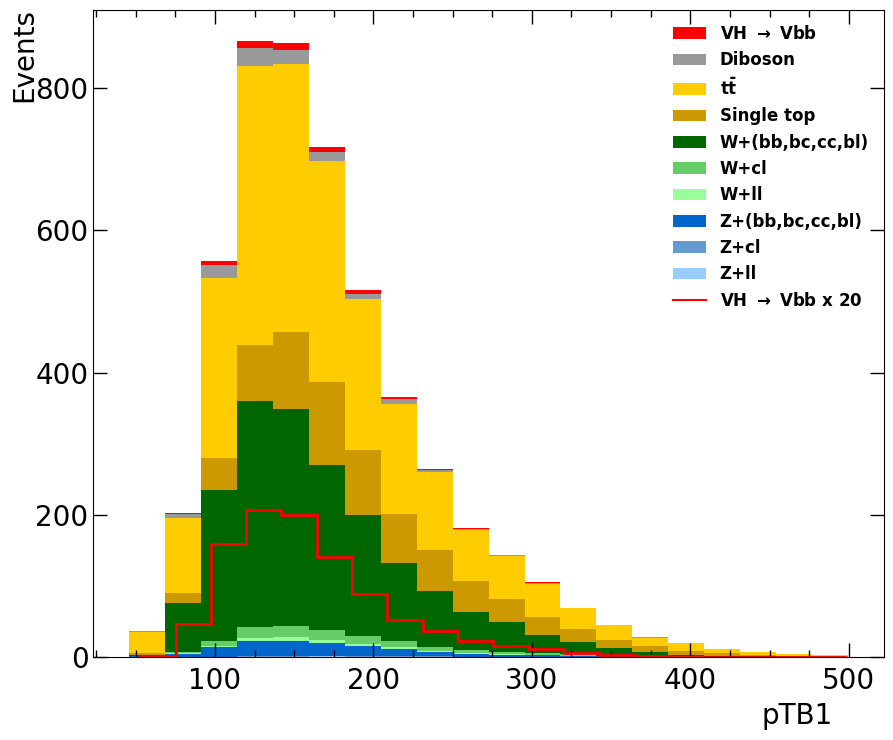

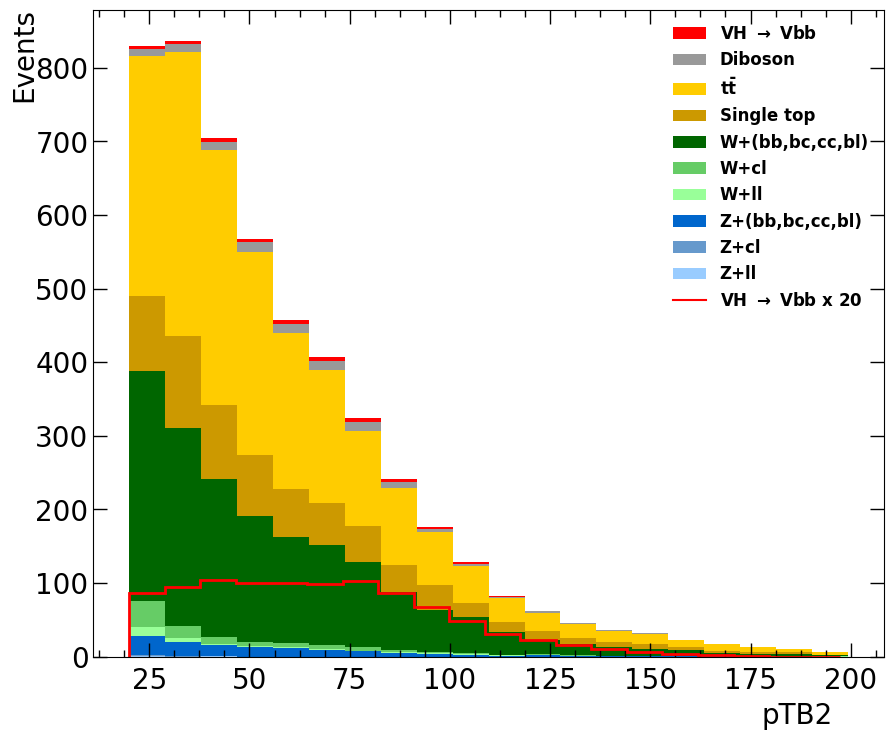

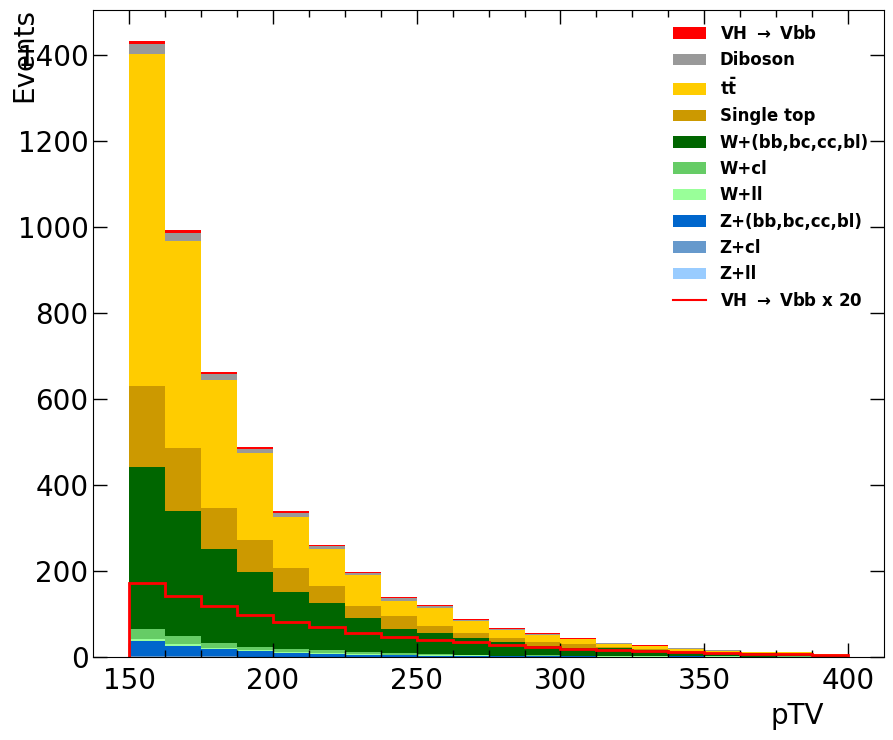

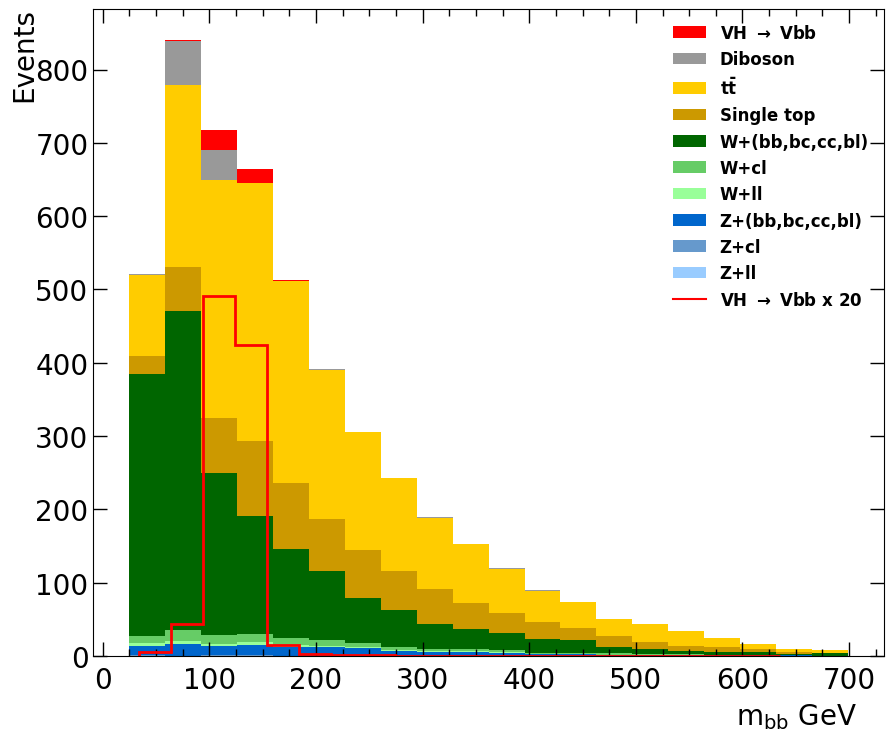

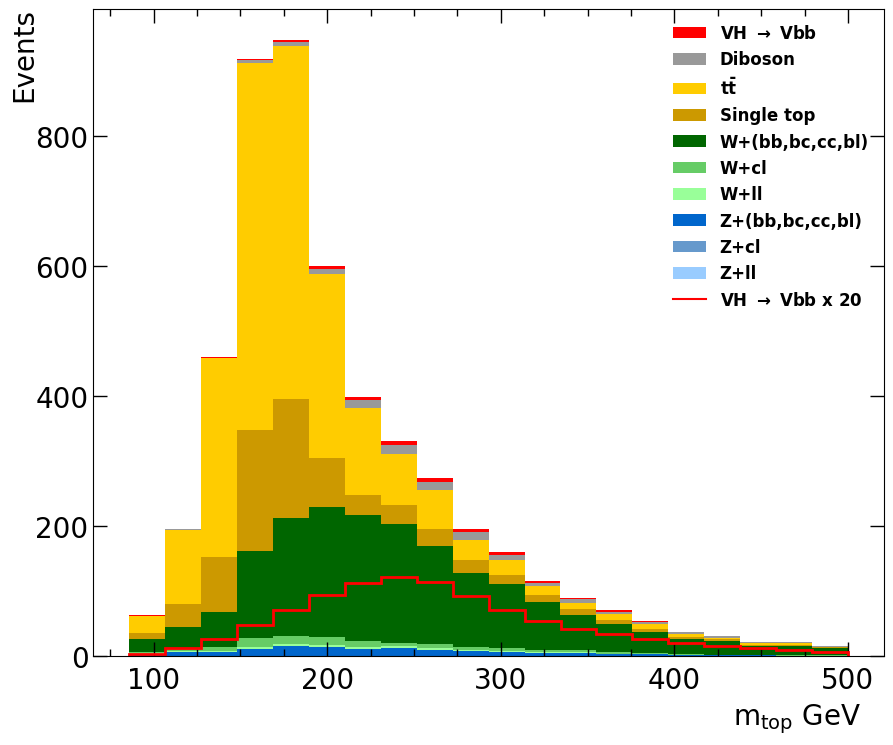

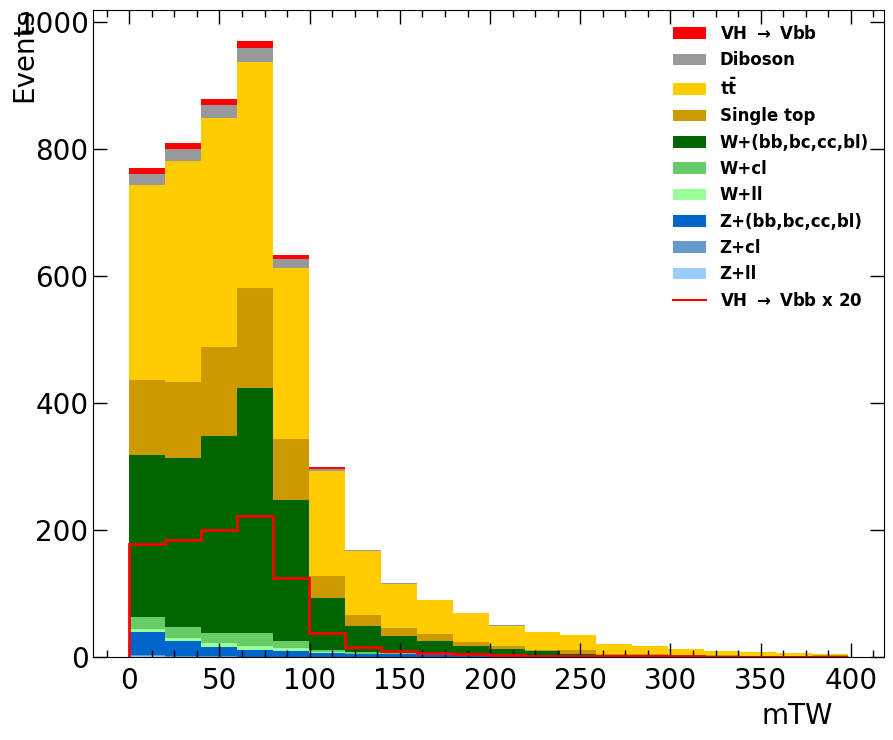

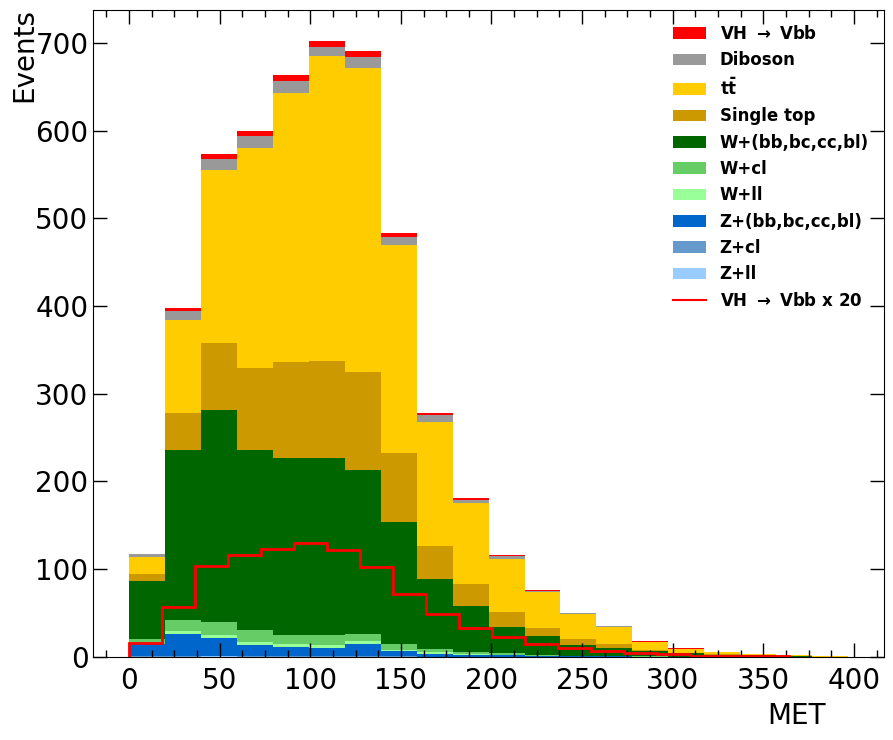

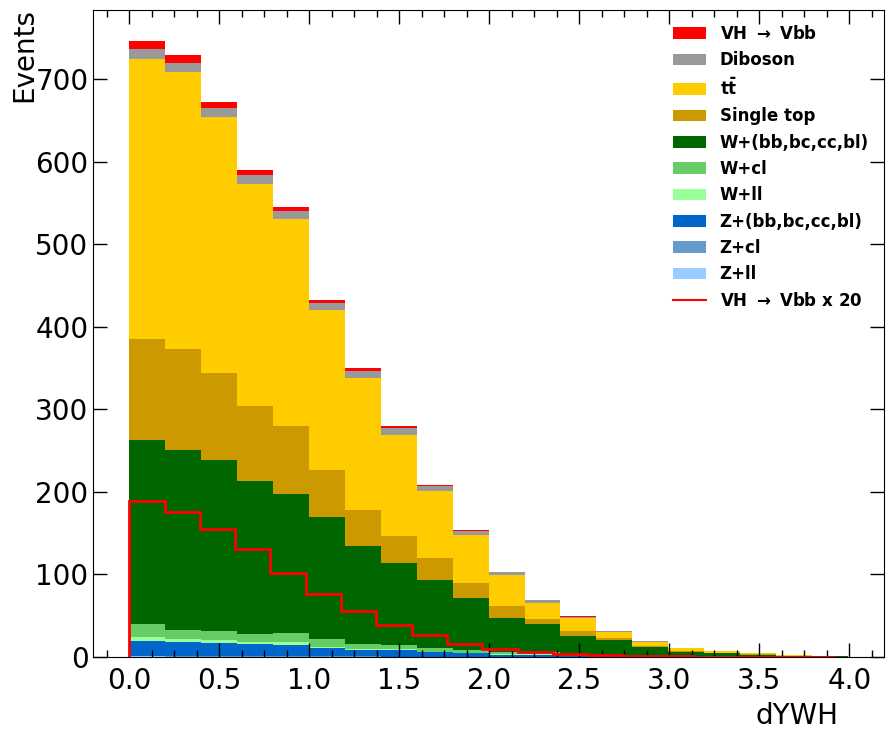

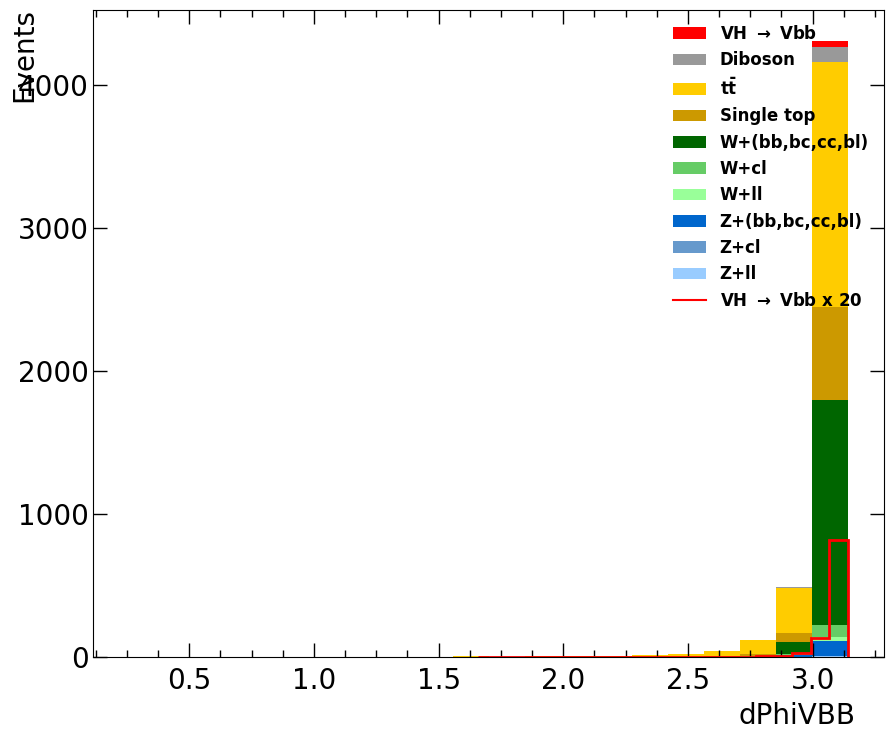

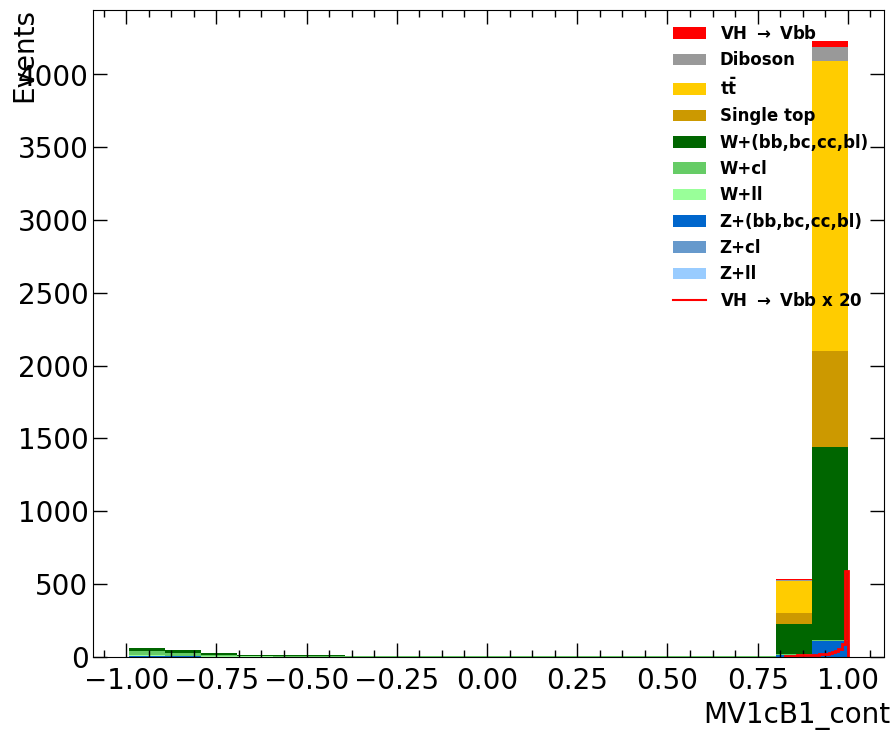

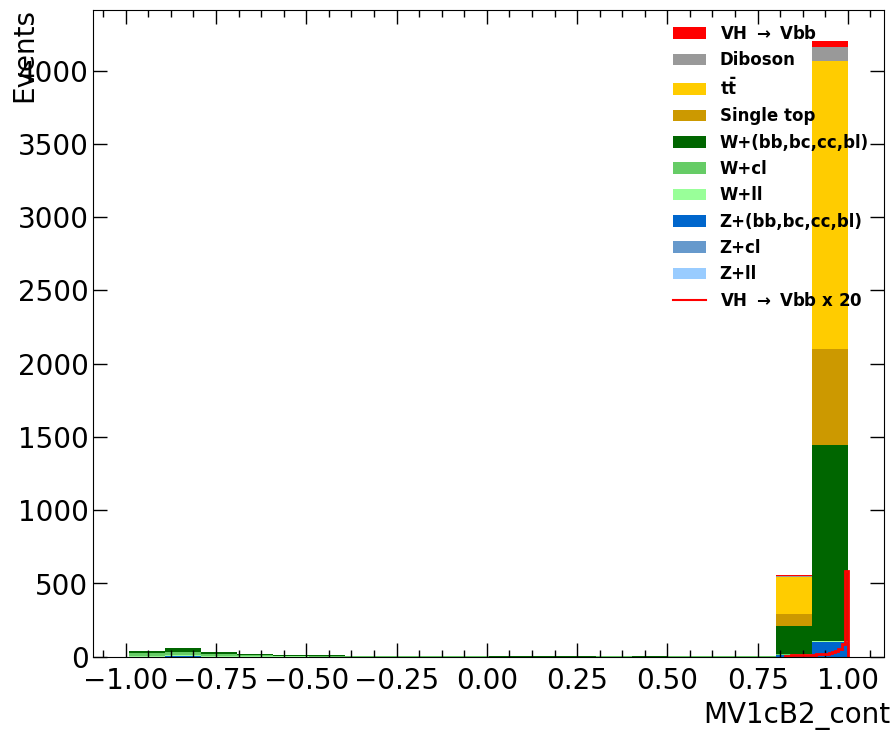

In [27]:
print(df_trim.columns)

# seem to be an issue when graphing the histograms for variables including pTB1/2
# - histograms are not scaled by the same 1/1e3 factor


plot_variable(df_trim, 'dRBB')
plot_variable(df_trim, 'pTB1')
plot_variable(df_trim, 'pTB2')
plot_variable(df_trim, 'pTV')
plot_variable(df_trim, 'mBB')
plot_variable(df_trim, 'Mtop')
plot_variable(df_trim, 'mTW')
plot_variable(df_trim, 'MET')
plot_variable(df_trim, 'dYWH')
plot_variable(df_trim, 'dPhiVBB')
plot_variable(df_trim, 'MV1cB1_cont')
plot_variable(df_trim, 'MV1cB2_cont')

# variables that show promise include dRBB, dPhiVBB, MV1cB1_cont and MV1cB2_cont

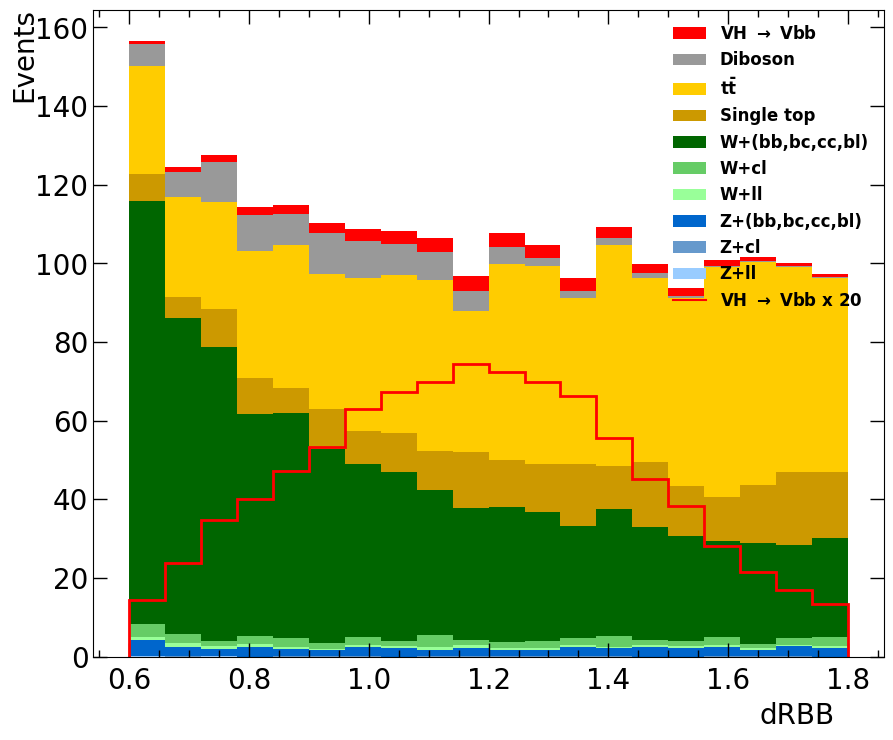

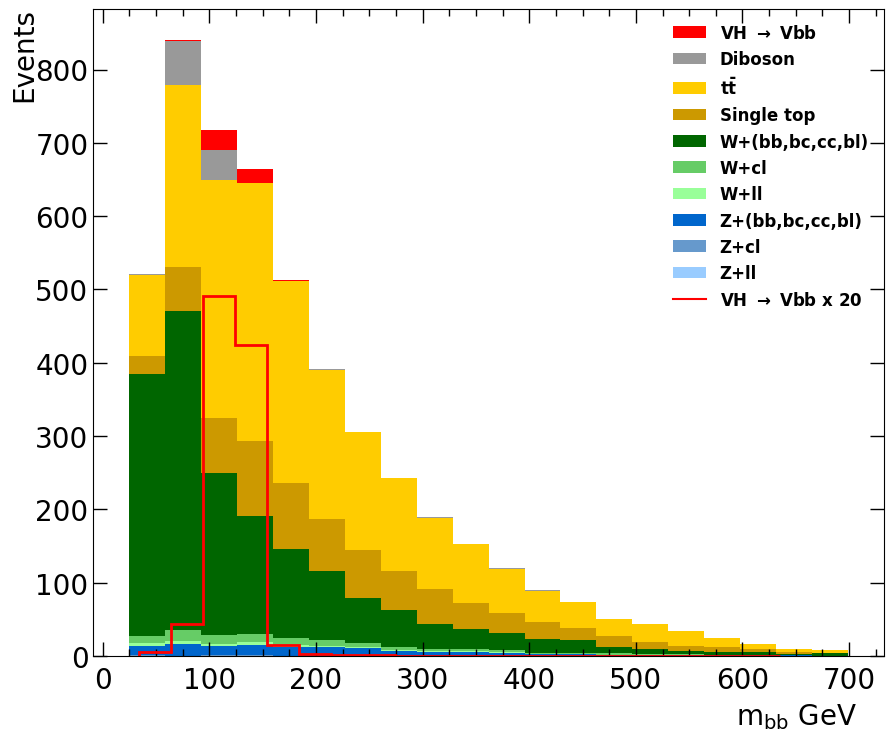

Sensitivity achieved before cuts  1.4990772856082444


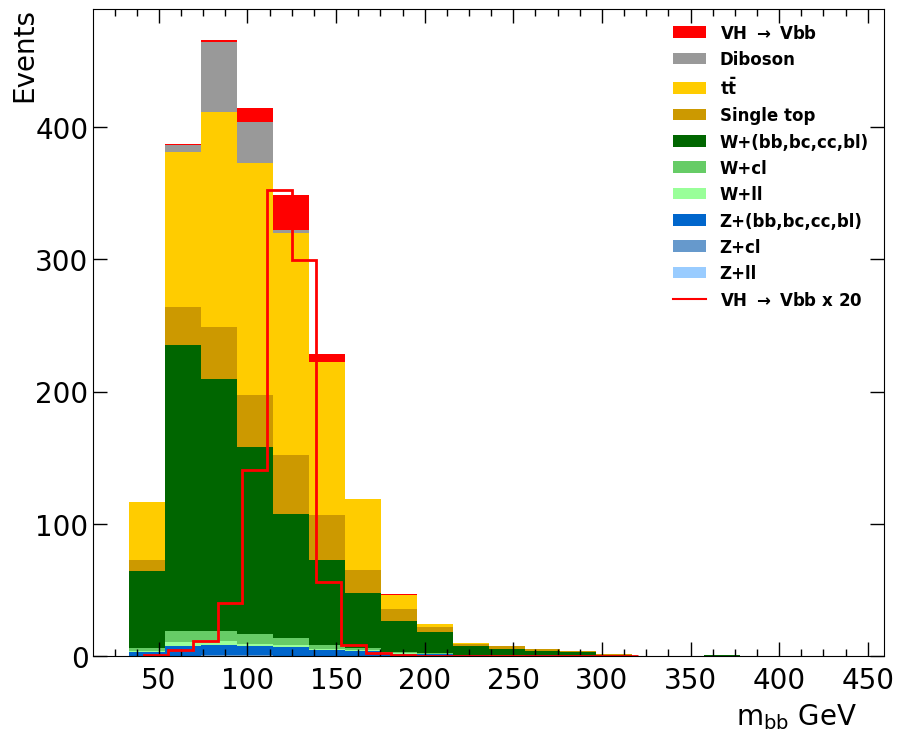

Sensitivity achieved after cuts  1.5909707441758347


In [36]:
# manual + greedy algorithm - keep reducing until sensitivity decreases on one dimension

# manual:

# Apply cut
df_trim1 = df_trim[(df_trim['dRBB'] < 1.8) & (df_trim['dRBB'] > 0.6)] #dRBB between 0.6 and 1.8


#
plot_variable(df_trim1, 'dRBB')

# The code below plots the mBB distribution before any selection is applied
plot_variable(df_trim,'mBB')

# Calculate and output the sensitivity based up the original mBB distribution prior to any selection
# The sensitivity is calculated using the profile likelihood ratio test and Asimov approach
print("Sensitivity achieved before cuts ",sensitivity_cut_based(df_trim))

# The code below plots the mBB distribution after the selection has applied
plot_variable(df_trim1,'mBB')

# Calculate and output the sensitivity based up the mBB distribution after the selectoin has been applied
print("Sensitivity achieved after cuts ",sensitivity_cut_based(df_trim1))

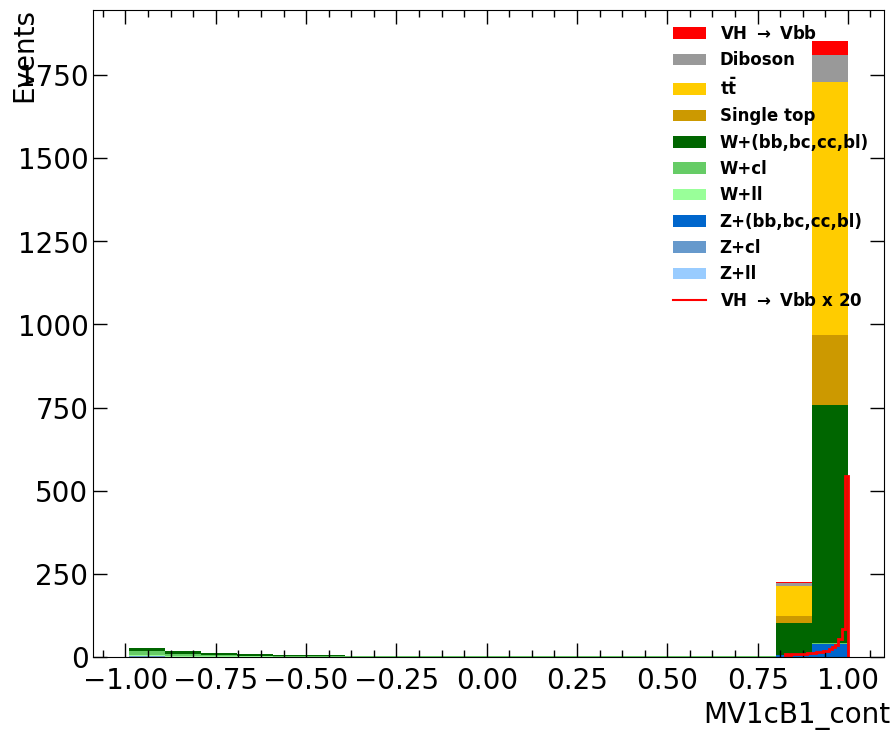

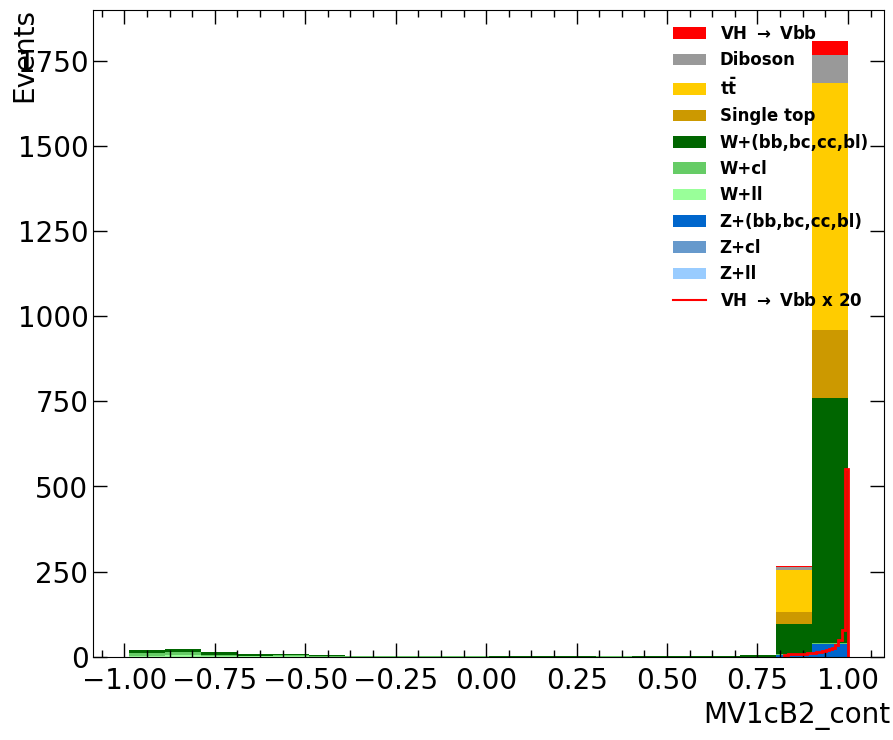

In [39]:
plot_variable(df_trim1,'MV1cB1_cont')
plot_variable(df_trim1,'MV1cB2_cont')

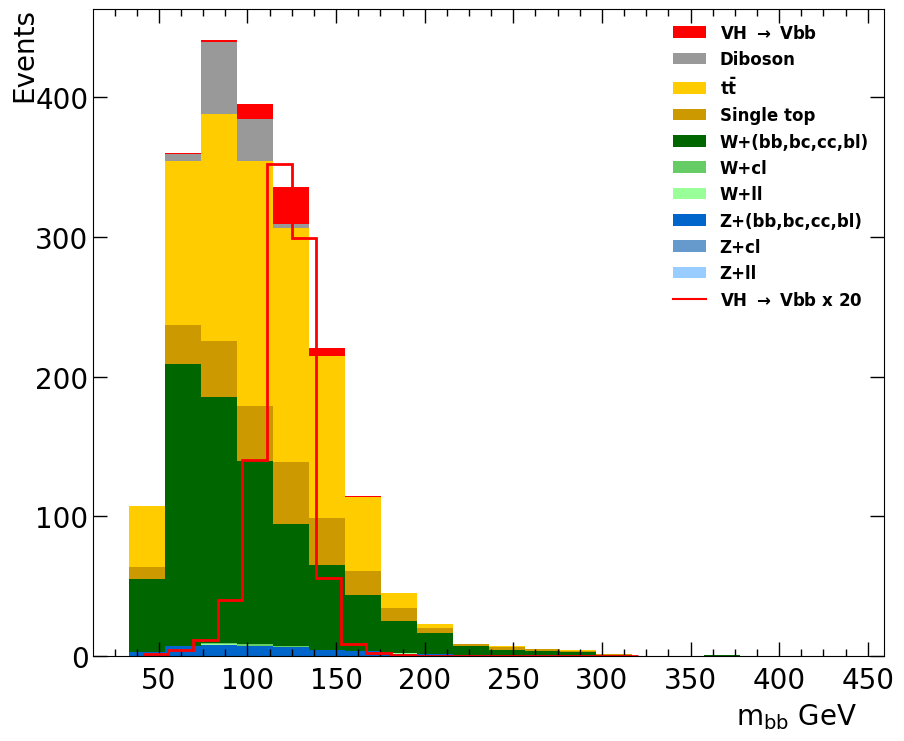

Sensitivity achieved before cuts  1.6220599749775668


In [43]:
df_trim2 = df_trim1[(df_trim1['MV1cB1_cont'] > 0.75) & (df_trim1['MV1cB2_cont'] > 0.75)]
plot_variable(df_trim2, 'mBB')
print("Sensitivity achieved before cuts ",sensitivity_cut_based(df_trim2))

In [77]:
def grid_search_cutting(df, var, cut_range, n_cuts):
  """
  df: dataframe to cut on
  var: variable to cut on
  cut_range: range of cuts to try
  n_cuts: number of cuts to try within range. DO NOT SET THIS TOO HIGH (<10)
  Each cut will be cut_range/(n_cuts - 1) apart.

  Preliminary search on a coarser grain, hoping to find a rough area to focus on.
  Dependent on sensitivity_cut_based().
  """
  cut_vals = np.linspace(cut_range[0], cut_range[1], n_cuts)
  sensitivity_mat = []
  for i in range(n_cuts - 1): #lower bound
    sensitivity_vec = list(np.zeros(i))
    for j in range(i + 1, n_cuts): #upper bound
      df_cut = df[(df[var] > cut_vals[i]) & (df[var] < cut_vals[j])]
      sensitivity_vec.append(sensitivity_cut_based(df_cut))
    sensitivity_mat.append(sensitivity_vec)

  return np.array(sensitivity_mat)

In [78]:
def grid_search_cutting_fine(df, var, lower_range, upper_range, n_cuts):
  """
  df: dataframe to cut on
  var: variable to cut on
  lower_range: lower range of cuts to try
  upper_range: upper range of cuts to try
  n_cuts: number of cuts to try within each range
  Each cut will be range/(n_cuts - 1) apart.

  Dependent on sensitivity_cut_based().
  Finer search once grid_search_cutting has been used
  """
  cut_vals = np.linspace(cut_range[0], cut_range[1], n_cuts)
  sens_dict = {}
  lower_cuts = np.linspace(*lower_range, n_cuts)
  upper_cuts = np.linspace(*upper_range, n_cuts) #haha funny uppercut get it
  for i in range(n_cuts - 1): #lower bound
    for j in range(n_cuts - 1): #upper bound
      df_cut = df[(df[var] > lower_cuts[i]) & (df[var] < upper_cuts[j])]
      sens_dict[(lower_cuts[i], upper_cuts[j])] = sensitivity_cut_based(df_cut)

  return pd.Dataframe_from_dict(sens_dict)

/content/ucl_masterclass.py:538: RuntimeWarning: invalid value encountered in scalar divide
  this_sens = 2 * ((s + b) * math.log(1 + s / b) - s) #calcs sensivity for each bin
/content/ucl_masterclass.py:538: RuntimeWarning: divide by zero encountered in scalar divide
  this_sens = 2 * ((s + b) * math.log(1 + s / b) - s) #calcs sensivity for each bin


Text(0, 0.5, 'Upper Bound')

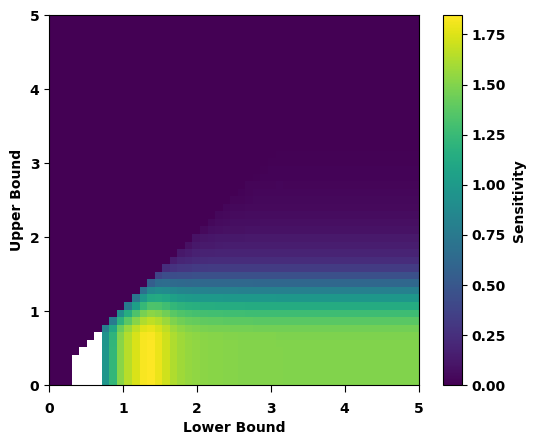

In [49]:
dRBB_matrix = grid_search_cutting_fine(df_trim, 'dRBB', [], [0,5], 20) #REALLY LONG! RESTRICT SEPARATE UPPER AND LOWER BOUNDS
plt.imshow(dRBB_matrix, cmap='viridis', origin='lower', extent=[0,5,0,5])
plt.colorbar(label='Sensitivity')
plt.xlabel('Lower Bound')
plt.ylabel('Upper Bound')

In [57]:
found_max = np.max(dRBB_matrix[dRBB_matrix != np.inf])
print(found_max)

1.8464117398226914


In [74]:
max_index = np.array(np.where(dRBB_matrix == found_max))[:,0]
print(max_index)

[ 0 13]


In [75]:
dRBB_lower, dRBB_upper = np.linspace(0,5,50)[max_index]
print(dRBB_lower, dRBB_upper)

0.0 1.3265306122448979


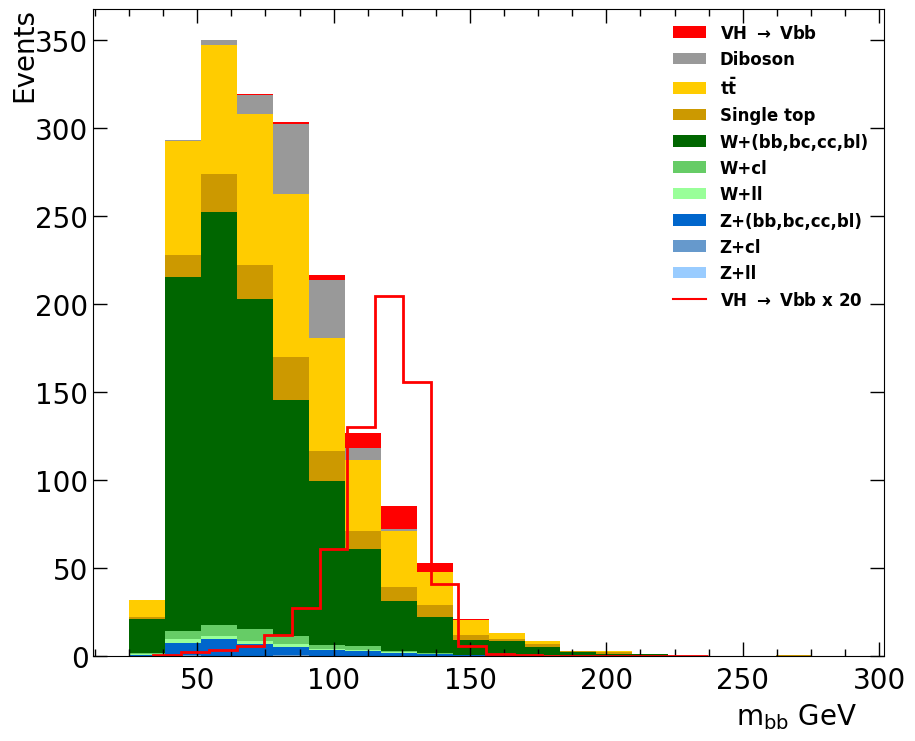

In [76]:
df_trim1 = df_trim[(df_trim['dRBB'] > dRBB_lower) & (df_trim['dRBB'] < dRBB_upper)]
plot_variable(df_trim1, 'mBB')